Import data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

data = pd.read_csv('inpatientCharges.csv')
data.head(5)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


Basic overview

In [2]:
print(data.shape)
print(data.columns) # check column names
data.describe() # Get the Simple Summary Statistics

(163065, 12)
Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')


,Provider Id,Provider Zip Code,Total Discharges
count,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304
std,151563.671767,27854.323080,51.104042
min,10001.000000,1040.000000,11.000000
25%,110092.000000,27261.000000,17.000000
50%,250007.000000,44309.000000,27.000000
75%,380075.000000,72901.000000,49.000000
max,670077.000000,99835.000000,3383.000000


Data Cleaning

In [3]:
data.columns = ['DRG_Definition', 'Provider_Id', 'Provider_Name',
                'Provider_Street_Address', 'Provider_City', 'Provider_State',
                'Provider_Zip_Code', 'Hospital_Referral_Region_Description',
                'Total_Discharges', 'Average_Covered_Charges',
                'Average_Total_Payments', 'Average_Medicare_Payments']

In [4]:
#data['Average_Covered_Charges'] = data['Average_Covered_Charges'].str.strip('$')
#data['Average_Total_Payments'] = data['Average_Total_Payments'].str.strip('$')
#data['Average_Medicare_Payments'] = data['Average_Medicare_Payments'].str.strip('$')
data.head(5)

,DRG_Definition,Provider_Id,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Hospital_Referral_Region_Description,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


In [5]:
#!pip install squarify

In [6]:
data['Average_Total_Payments'].describe()

count       163065
unique      147842
top       $4370.00
freq             9
Name: Average_Total_Payments, dtype: object

In [7]:
data['DRG_Definition'] = data['DRG_Definition'].astype('category')
data['Provider_State'] = data['Provider_State'].astype('category')
data['Provider_City'] = data['Provider_City'].astype('category')
data['Provider_Id'] = data['Provider_Id'].astype('category')
data['Average_Total_Payments'] = (data['Average_Total_Payments']
                                  .str.replace(r'[^-+\d.]', '').astype(float))
data['Average_Medicare_Payments'] = (data['Average_Medicare_Payments']
                                    .str.replace(r'[^-+\d.]', '').astype(float))

<ipython-input-7-a4718f4a9b0a>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Average_Total_Payments'] = (data['Average_Total_Payments']
<ipython-input-7-a4718f4a9b0a>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Average_Medicare_Payments'] = (data['Average_Medicare_Payments']


# EDA

<AxesSubplot:xlabel='Provider_State', ylabel='Count'>

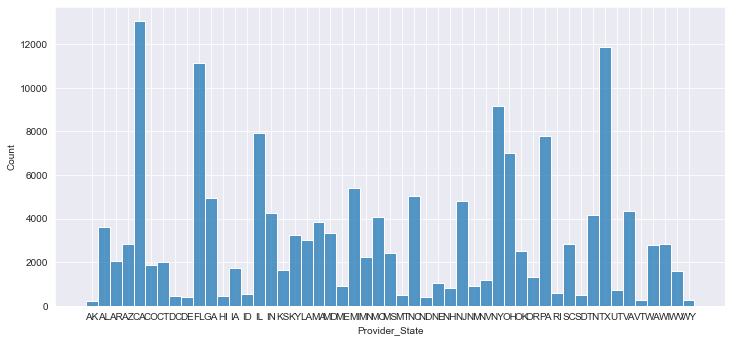

In [8]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,5.5)
sns.histplot(data['Provider_State'])

In [9]:
state_cnt = data['Provider_State'].value_counts()
state_cnt = pd.DataFrame(state_cnt)
#state_cnt

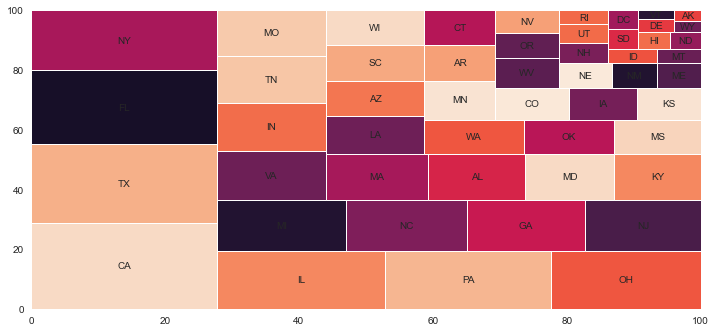

In [10]:
import squarify
squarify.plot(state_cnt['Provider_State'], label=state_cnt.index)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'CHICAGO'),
  Text(1, 0, 'BALTIMORE'),
  Text(2, 0, 'HOUSTON'),
  Text(3, 0, 'PHILADELPHIA'),
  Text(4, 0, 'BROOKLYN'),
  Text(5, 0, 'SPRINGFIELD'),
  Text(6, 0, 'COLUMBUS'),
  Text(7, 0, 'LOS ANGELES'),
  Text(8, 0, 'NEW YORK'),
  Text(9, 0, 'DALLAS'),
  Text(10, 0, 'LAS VEGAS'),
  Text(11, 0, 'JACKSON'),
  Text(12, 0, 'JACKSONVILLE'),
  Text(13, 0, 'COLUMBIA'),
  Text(14, 0, 'WASHINGTON'),
  Text(15, 0, 'CINCINNATI'),
  Text(16, 0, 'MIAMI'),
  Text(17, 0, 'CLEVELAND'),
  Text(18, 0, 'BOSTON'),
  Text(19, 0, 'INDIANAPOLIS')])

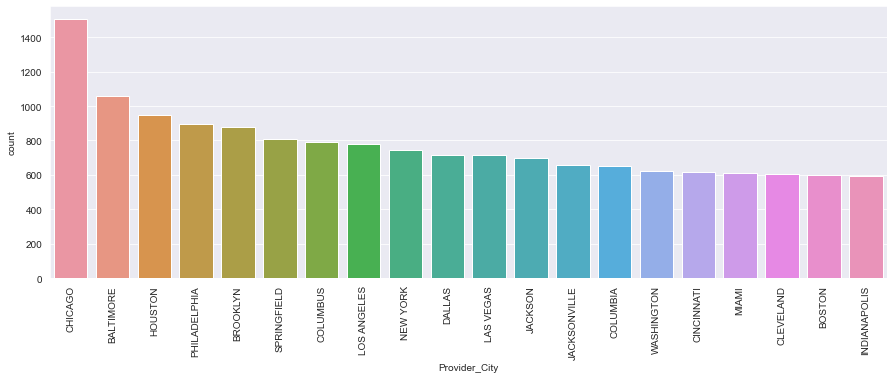

In [11]:
plt.figure(figsize=(15,5))
ch = sns.countplot(x='Provider_City',data=data,order=data['Provider_City'].value_counts()[:20].index)
plt.xticks(rotation = 90)

# Feature 1: Average of the average total payments by each provider

In [12]:
mean_by_provider = data.groupby(['Provider_Name'])['Average_Total_Payments'].mean()
mean_by_provider = pd.DataFrame(mean_by_provider)
mean_by_provider.columns = ['mean_by_provider']
#mean_by_provider

In [13]:
# add the new feature average of the average total payments by each provider
data1 = pd.merge(data, mean_by_provider, how='left', on=['Provider_Name'])
# Feature 1: average of the average total payments by each provider
data1['mean_by_provider'] = np.where(data1['mean_by_provider']==0,0, data1['mean_by_provider'])
data1['mean_by_provider'].describe()

count    163065.000000
mean       9707.473804
std        2655.889627
min        3291.310000
25%        8015.357342
50%        9264.698039
75%       10837.113854
max       50552.610000
Name: mean_by_provider, dtype: float64

<AxesSubplot:xlabel='Provider_State', ylabel='mean_by_provider'>

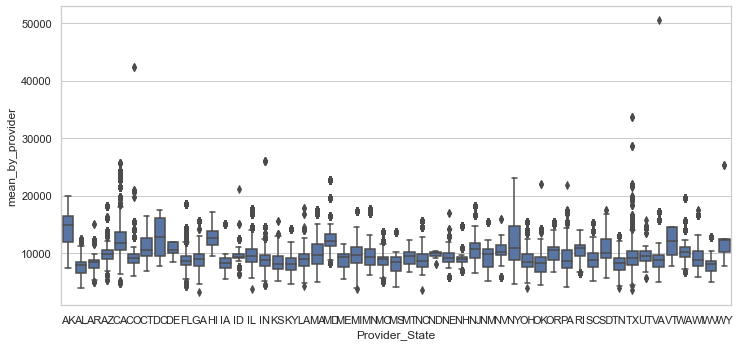

In [14]:
sns.set(style="whitegrid")
sns.boxplot(x="Provider_State", y="mean_by_provider",
            color="b",  data=data1)

This variable records the mean of each provider. It could make a detection when we compare each of them with other providers such as other providers from the same state. For example, the above box plot shows the outliers of each state.

# Feature 2: The ratio of the mean of the average total payments by each provider

In [15]:
ratio_mean_by_provider = data.groupby(['Provider_Name'])['Average_Total_Payments'].mean()
ratio_mean_by_provider = pd.DataFrame(ratio_mean_by_provider)
ratio_mean_by_provider.columns = ['ratio_mean_by_provider']
#ratio_mean_by_provider

In [16]:
# add the new feature average of the average total payments by each provider
data2 = pd.merge(data1, ratio_mean_by_provider, how='left', on=['Provider_Name'])
# Feature 2: ratio of the mean of the average total payments by each provider
data2['ratio_mean_by_provider'] = np.where(data2['ratio_mean_by_provider']==0,0, data2['ratio_mean_by_provider']/data2['Average_Total_Payments'])
data2['ratio_mean_by_provider'].describe()

count    163065.000000
mean          1.313644
std           0.581753
min           0.120945
25%           0.841027
50%           1.283607
75%           1.728707
max           7.010555
Name: ratio_mean_by_provider, dtype: float64

<AxesSubplot:xlabel='ratio_mean_by_provider', ylabel='Count'>

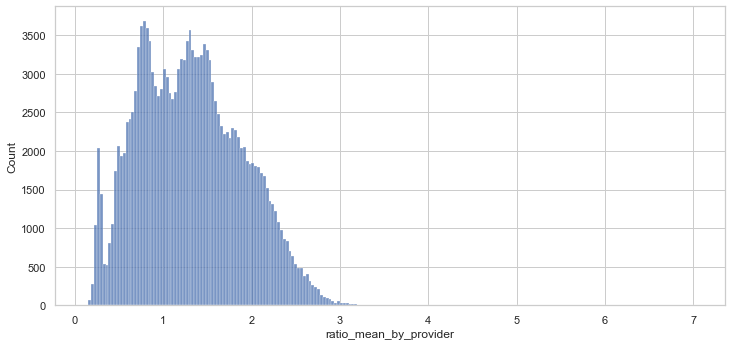

In [17]:
sns.histplot(data2['ratio_mean_by_provider'])

This feature records the ratio of the mean of each provider. We could find outliers by comparing the ratio of all providers. The cases with a very large ratio could be the outliers. For example, in the above histogram, the ones above 3 means that they have an average total cost that is more than 3 times greater than the mean of this provider.

# Feature 3: Median of the average total payments by each provider

In [18]:
median_by_provider = data.groupby(['Provider_Name'])['Average_Total_Payments'].mean()
median_by_provider = pd.DataFrame(median_by_provider)
median_by_provider.columns = ['median_by_provider']
#median_by_provider

In [19]:
# add the new feature median of the average total payments by each provider
data3 = pd.merge(data2, median_by_provider, how='left', on=['Provider_Name'])
# Feature 3: Median of the average total payments by each provider
data3['median_by_provider'] = np.where(data3['median_by_provider']==0,0, data3['median_by_provider'])
data3['median_by_provider'].describe()

count    163065.000000
mean       9707.473804
std        2655.889627
min        3291.310000
25%        8015.357342
50%        9264.698039
75%       10837.113854
max       50552.610000
Name: median_by_provider, dtype: float64

Similar as the previous one, this variable records the median of each provider. Sometimes it could be more useful than the mean since sometimes the mean could be affected by outliers.

# Feature 4: Ratio of the median of the average total payments by each provider

In [20]:
ratio_median_by_provider = data.groupby(['Provider_Name'])['Average_Total_Payments'].mean()
ratio_median_by_provider = pd.DataFrame(ratio_median_by_provider)
ratio_median_by_provider.columns = ['ratio_median_by_provider']
ratio_median_by_provider

,ratio_median_by_provider
Provider_Name,
ABBEVILLE GENERAL HOSPITAL,6663.217222
ABBOTT NORTHWESTERN HOSPITAL,10904.566289
ABILENE REGIONAL MEDICAL CENTER,8861.500862
ABINGTON MEMORIAL HOSPITAL,10321.999293
ACMH HOSPITAL,5901.026667
...,...
YAVAPAI REGIONAL MEDICAL CENTER-EAST,7369.189630
YORK HOSPITAL,9887.716286
YUKON KUSKOKWIM DELTA REG HOSPITAL,9939.553333


In [21]:
# add the new feature average of the average total payments by each provider
data4 = pd.merge(data3, ratio_median_by_provider, how='left', on=['Provider_Name'])
# Feature 4: Ratio of the median of the average total payments by each provider
data4['ratio_median_by_provider'] = np.where(data4['ratio_median_by_provider']==0,0, data4['ratio_median_by_provider']/data4['Average_Total_Payments'])
data4['ratio_median_by_provider'].describe()

count    163065.000000
mean          1.313644
std           0.581753
min           0.120945
25%           0.841027
50%           1.283607
75%           1.728707
max           7.010555
Name: ratio_median_by_provider, dtype: float64

<AxesSubplot:xlabel='ratio_median_by_provider', ylabel='Count'>

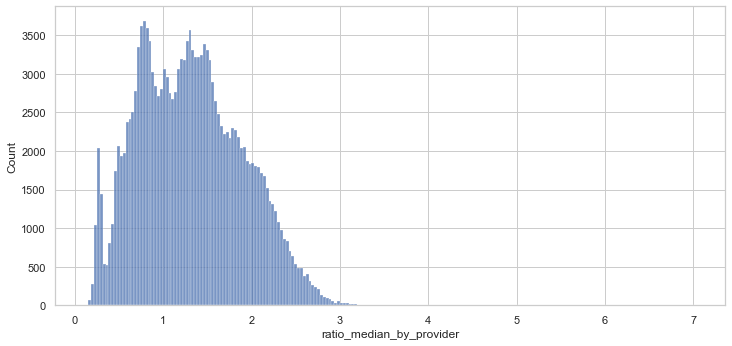

In [22]:
sns.histplot(data4['ratio_median_by_provider'])

Similar as feature 2, this feature records the ratio of the median of each provider. We could find outliers by comparing the ratio of all providers. The cases with a very large ratio could be the outliers. For example, in the above histogram, the ones above 3 are having an average total cost that is more than 3 times greater than the median of this provider.

# Feature 5: Average payments that pay by beneficiary or payments by third parties for coordination of benefits

In [23]:
Average_beneficiary_Payments = data['Average_Total_Payments'] - data['Average_Medicare_Payments']
Average_beneficiary_Payments = pd.DataFrame(Average_beneficiary_Payments)
Average_beneficiary_Payments.columns = ['Average_beneficiary_Payments']
#Average_beneficiary_Payments

In [24]:
# add the new feature average of the average total payments by each provider
data5 = data4
data5['Average_beneficiary_Payments'] = Average_beneficiary_Payments
# Feature 5: Average payments that pay by beneficiary or payments by third parties for coordination of benefits
data5['Average_beneficiary_Payments'].describe()

count    163065.000000
mean       1212.982840
std        1148.097584
min           0.000000
25%         776.310000
50%         935.720000
75%        1221.410000
max       75998.660000
Name: Average_beneficiary_Payments, dtype: float64

<AxesSubplot:xlabel='Average_beneficiary_Payments', ylabel='Count'>

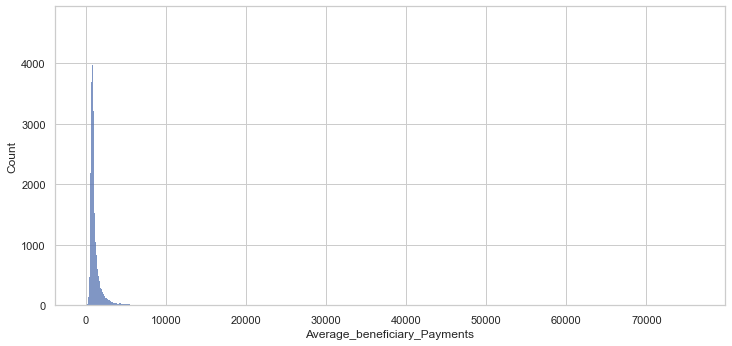

In [25]:
sns.histplot(data5['Average_beneficiary_Payments'])

According to the data description, Average Total Payments refers to what Medicare actually pays to the provider, and co-payment and deductible amounts that the beneficiary is responsible for and payments by third parties for coordination of benefits. Therefore, I use Average_Total_Payments minus Average_Medicare_Payments to get the number that pay by beneficiary or payments by third parties for coordination of benefits. We can see that the max amount in this feature is 75998.66, which is extremely high. By this feature, we could detect the abnormal high amount of pay that beneficiary that would neet to pay as outliers.

# Feature 6: Ratio of average payments that pay by beneficiary or payments by third parties for coordination of benefits

In [26]:
ratio_Average_beneficiary_Payments = data5['Average_beneficiary_Payments'] / data5['Average_Total_Payments']
ratio_Average_beneficiary_Payments = pd.DataFrame(ratio_Average_beneficiary_Payments)
ratio_Average_beneficiary_Payments.columns = ['ratio_Average_beneficiary_Payments']
ratio_Average_beneficiary_Payments

,ratio_Average_beneficiary_Payments
0,0.175432
1,0.140104
2,0.180528
3,0.237819
4,0.142602
...,...
163060,0.193196
163061,0.342070
163062,0.288551
163063,0.106295


In [27]:
# add the new feature average of the average total payments by each provider
data6 = data5
data6['ratio_Average_beneficiary_Payments'] = ratio_Average_beneficiary_Payments
# Feature 6: Ratio of average payments that pay by beneficiary or payments by third parties for coordination of benefits
data6['ratio_Average_beneficiary_Payments'].describe()

count    163065.000000
mean          0.153455
std           0.087911
min           0.000000
25%           0.086496
50%           0.139811
75%           0.203366
max           0.956845
Name: ratio_Average_beneficiary_Payments, dtype: float64

<AxesSubplot:xlabel='ratio_Average_beneficiary_Payments', ylabel='Count'>

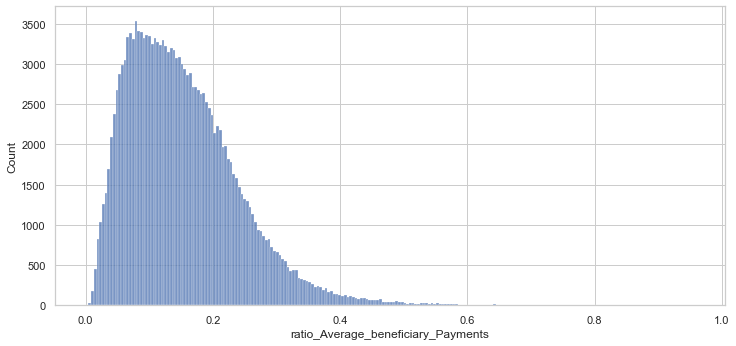

In [28]:
sns.histplot(data6['ratio_Average_beneficiary_Payments'])

This feature is the ratio of the previous feature divided by Average_Total_Payments. This would give as a clue of how much percent dose the beneficiaries might need to pay even with the medical care. We can see that most of the data has below 40%, so the cases that are higher than 40% might be the anomalies.

# Feature 7: Average of total discharges by state

In [29]:
discharge_by_states = data.groupby(['Provider_State'])['Total_Discharges'].mean()
discharge_by_states = pd.DataFrame(discharge_by_states)
discharge_by_states.columns = ['discharge_by_states']
#discharge_by_states

In [30]:
# add the new feature average of the average total payments by each provider
data7 = pd.merge(data6, discharge_by_states, how='left', on=['Provider_State'])
# Feature 7: Average of total discharges by state
data7['discharge_by_states'] = np.where(data7['discharge_by_states']==0,0, data7['discharge_by_states'])
data7['discharge_by_states'].describe()

count    163065.000000
mean         42.776304
std           5.874590
min          26.457490
25%          38.520878
50%          41.852824
75%          47.456635
max          67.901015
Name: discharge_by_states, dtype: float64

<AxesSubplot:xlabel='discharge_by_states', ylabel='count'>

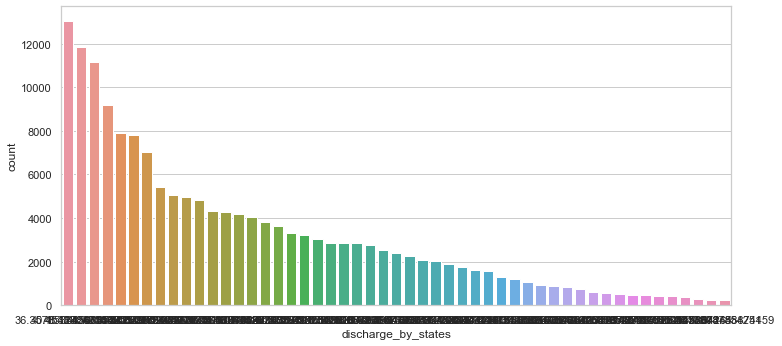

In [31]:
sns.countplot(x='discharge_by_states',data=data7,order=data7['discharge_by_states'].value_counts().index)
#plt.xticks(rotation = 90)

According to data description, Total_Discharges represents the number of beneficiaries who were released from the inpatient hospital after receiving care. From this feature, we could see that there is more than 2 times of difference from the largest to the smallest. Also, some states are having significantly higher count than the others.

# Feature 8: Average of average total payment by state

In [32]:
total_payments_by_states = data.groupby(['Provider_State'])['Average_Total_Payments'].median()
total_payments_by_states = pd.DataFrame(total_payments_by_states)
total_payments_by_states.columns = ['total_payments_by_states']
total_payments_by_states = total_payments_by_states.reset_index()

In [33]:
# add the new feature average of the average total payments by each provider
data8 = pd.merge(data7, total_payments_by_states, how='left', on=['Provider_State'])
# Feature 8: Average of average total payment by state
data8['total_payments_by_states'] = np.where(data8['total_payments_by_states']==0,0, data8['total_payments_by_states'])
data8['total_payments_by_states'].describe()

count    163065.000000
mean       7270.891803
std         989.463374
min        5876.370000
25%        6578.980000
50%        6927.475000
75%        7671.360000
max       11190.080000
Name: total_payments_by_states, dtype: float64

<AxesSubplot:xlabel='total_payments_by_states', ylabel='count'>

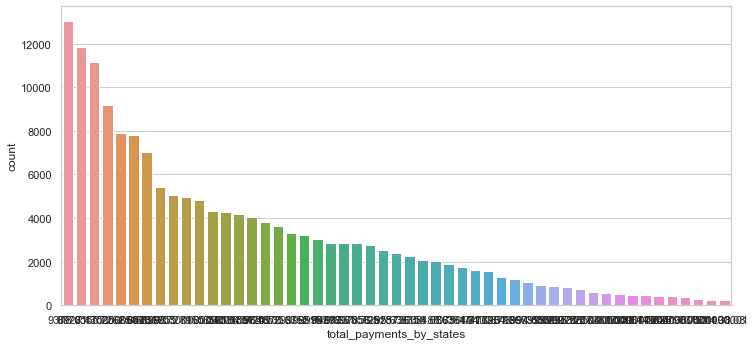

In [34]:
sns.countplot(x='total_payments_by_states',data=data8,order=data8['total_payments_by_states'].value_counts().index)
#plt.xticks(rotation = 90)

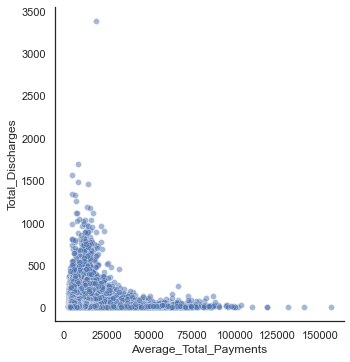

In [35]:
sns.set(style="white")
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Average_Total_Payments",
            y="Total_Discharges",
            hue=None,
            size=None,
            alpha=0.5,
            data=data8)

In [36]:
sample_data = data8.sample(n = 10000)

In [37]:
#X = sample_data["Total_Discharges"].values.reshape(-1,).astype('float32')
#y = sample_data["Average_Total_Payments"].values.reshape(-1,).astype('float32')
#fit = np.polyfit(np.log(X), y, 1)
#print(fit)

In [38]:
#fig,(ax1) = plt.subplots(1, figsize = (12,6))
#ax1.scatter (X, y, s = 8)
#plt.xlabel("Average_Total_Payments")
#plt.ylabel("Total_Discharges")
#y = fit[0] + fit[1] * np.log(X)
#plt.plot(X,y)
#plt.show()

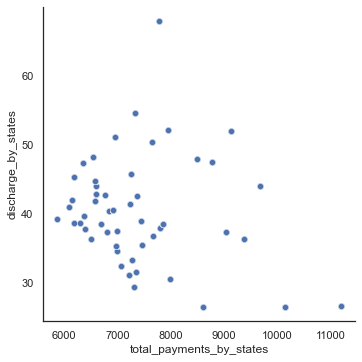

In [39]:
sns.set(style="white")
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="total_payments_by_states",
            y="discharge_by_states",
            hue=None,
            size=None,
            alpha=0.5,
            data=data8)

This feature is the average of average total payment by state. We would like to see if there is a pattern for the total payment given the geographic information. For the variables, we see that Average_Total_Payments and Total_Discharges shows a log or square kind of distribution. In order to ensure that, I create another graph with this feature vs discharge_by_states and comparing with that graph that is created with the average number of both variables. We could see that it is not showing any inter correlation.

# Feature 9: ratio_Average_beneficiary_Payments categories

In [40]:
def func(x):
    if x <= 0.2:
        return 'Less than 0.2'
    elif x > 0.2 and x <= 0.4:
        return 'Between 0.2 and 0.4'
    return 'Greater than 0.4'

data9 = data8
data9['ratio_Average_beneficiary_Payments_c'] = data9['ratio_Average_beneficiary_Payments'].apply(func)
#data9['ratio_Average_beneficiary_Payments_c']

In [41]:
data9['ratio_Average_beneficiary_Payments_c'].value_counts()

Less than 0.2          120592
Between 0.2 and 0.4     40185
Greater than 0.4         2288
Name: ratio_Average_beneficiary_Payments_c, dtype: int64

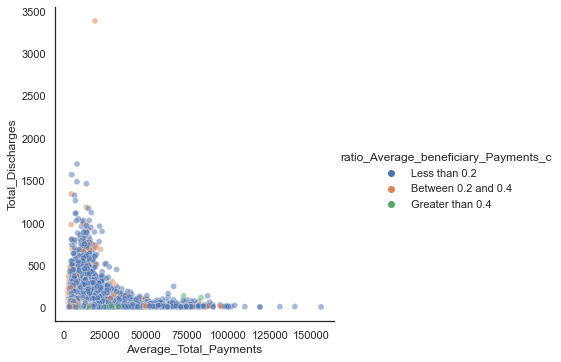

In [42]:
sns.set(style="white")
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Average_Total_Payments",
            y="Total_Discharges",
            hue="ratio_Average_beneficiary_Payments_c",
            size=None,
            alpha=0.5,
            data=data9)

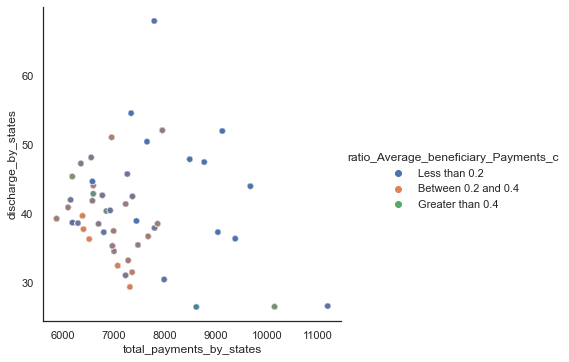

In [43]:
sns.set(style="white")
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="total_payments_by_states",
            y="discharge_by_states",
            hue="ratio_Average_beneficiary_Payments_c",
            size=None,
            alpha=0.5,
            data=data9)

I used feature 6, ratio of average payments that pay by beneficiary or payments by third parties for coordination of benefits, to create this categorical variable. Since most data are below 40%, I set "Greater than 0.4" to be the first category. The middle of the slope is at 0.2, so I had the other two categories as "Between 0.2 and 0.4" and "Less than 0.2". The above 2 plots are using this variable to interact with 2 different groups of scatter plot variables.

# Feature 10: Max of average total payment by state

In [44]:
max_payments_by_states = data.groupby(['Provider_State'])['Average_Total_Payments'].max()
max_payments_by_states = pd.DataFrame(max_payments_by_states)
max_payments_by_states.columns = ['max_payments_by_states']
max_payments_by_states = max_payments_by_states.reset_index()

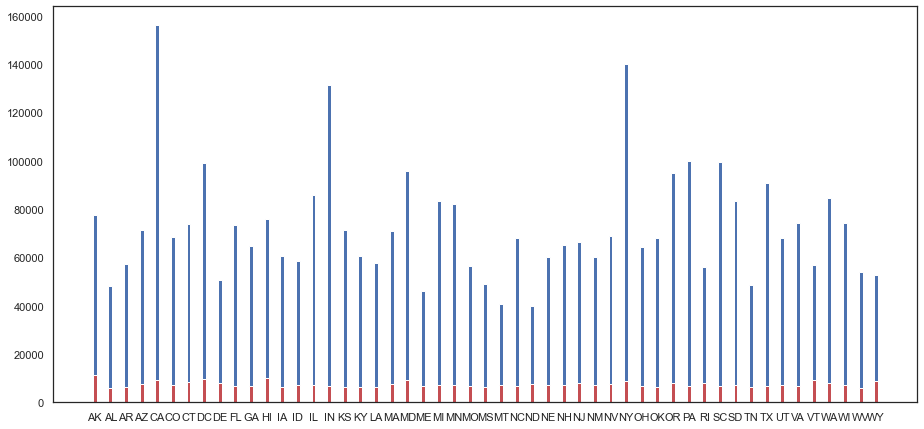

In [45]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(max_payments_by_states['Provider_State'],max_payments_by_states['max_payments_by_states'], color = 'b',  width = 0.25)
ax.bar(total_payments_by_states['Provider_State'],total_payments_by_states['total_payments_by_states'], color = 'r',  width = 0.25)
plt.show()

In [46]:
# add the new feature average of the average total payments by each provider
data10 = pd.merge(data9, max_payments_by_states, how='left', on=['Provider_State'])
# Feature 10: Max of average total payment by state
data10['max_payments_by_states'] = np.where(data10['max_payments_by_states']==0,0, data10['max_payments_by_states'])
data10['max_payments_by_states'].describe()

count    163065.000000
mean      85168.378484
std       30586.213435
min       39845.680000
25%       64668.660000
50%       73887.440000
75%       95868.640000
max      156158.180000
Name: max_payments_by_states, dtype: float64

This feature shows the max number of Average_Total_Payments for each state. Using this feature, I graphed the max_payments_by_states vs total_payments_by_states (shows the mean). The result shows that for some states, such as California Illinois and New York, the max number of payment is more than 10 times greater than the average. This shows that it is possible that large cities might have a larger possibility to get an outlier in Average_Total_Payments.

<AxesSubplot:xlabel='Total_Discharges'>

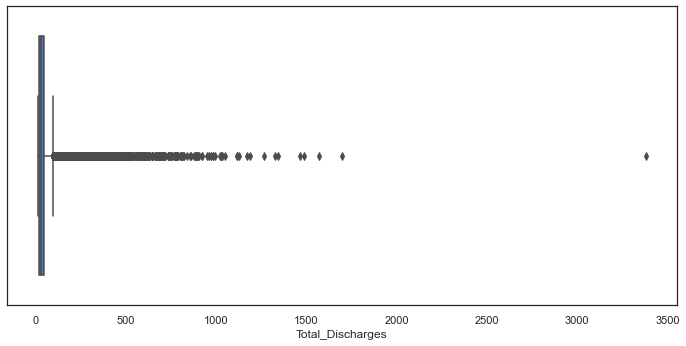

In [47]:
sns.boxplot(x=data9["Total_Discharges"])

In [48]:
#!pip install pyod

# Week 5 Assignment

Add on to week 4 assignment, here is the week 5 modeling

In [49]:
data10.head()

,DRG_Definition,Provider_Id,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Hospital_Referral_Region_Description,Total_Discharges,Average_Covered_Charges,...,mean_by_provider,ratio_mean_by_provider,median_by_provider,ratio_median_by_provider,Average_beneficiary_Payments,ratio_Average_beneficiary_Payments,discharge_by_states,total_payments_by_states,ratio_Average_beneficiary_Payments_c,max_payments_by_states
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,...,8749.025109,1.514395,8749.025109,1.514395,1013.51,0.175432,39.258322,5876.37,Less than 0.2,48198.38
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,...,6812.131224,1.177028,6812.131224,1.177028,810.86,0.140104,39.258322,5876.37,Less than 0.2,48198.38
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,...,8197.237907,1.508245,8197.237907,1.508245,981.16,0.180528,39.258322,5876.37,Less than 0.2,48198.38
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,...,8181.648391,1.510209,8181.648391,1.510209,1288.40,0.237819,39.258322,5876.37,Between 0.2 and 0.4,48198.38
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,...,7789.416250,1.376628,7789.416250,1.376628,806.89,0.142602,39.258322,5876.37,Less than 0.2,48198.38


I am going to use most of the features that I made in week 4 to create the model. data10 is the dataframe that stores all variables from the file and all the new variables as well.

# HBOS

In [50]:
X = data10[['Average_Total_Payments','Average_Medicare_Payments','ratio_mean_by_provider','ratio_Average_beneficiary_Payments','total_payments_by_states','discharge_by_states']]
X.head()

,Average_Total_Payments,Average_Medicare_Payments,ratio_mean_by_provider,ratio_Average_beneficiary_Payments,total_payments_by_states,discharge_by_states
0,5777.24,4763.73,1.514395,0.175432,5876.37,39.258322
1,5787.57,4976.71,1.177028,0.140104,5876.37,39.258322
2,5434.95,4453.79,1.508245,0.180528,5876.37,39.258322
3,5417.56,4129.16,1.510209,0.237819,5876.37,39.258322
4,5658.33,4851.44,1.376628,0.142602,5876.37,39.258322


In [51]:
from pyod.models.hbos import HBOS
n_bins = 50
hbos = HBOS(n_bins=n_bins,contamination=0.05)
hbos.fit(X)

y_scores_hbos = hbos.decision_function(X)
y_pred_hbos = hbos.predict(X)

# Threshold for the defined contamination rate
print("The threshold for the defined contamination rate:" , hbos.threshold_)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic.
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The data:", count_stat(y_pred_hbos))

The threshold for the defined contamination rate: 14.30712839623882
The data: {0: 154915, 1: 8150}


The model shows that we have a contamination rate of 14.307. Based on the model, any observation that has an anomaly score value that is greater than 14.307 is considered as an outlier. Also, within the 163065 of observations, 8150 are outliers and 154915 are not.

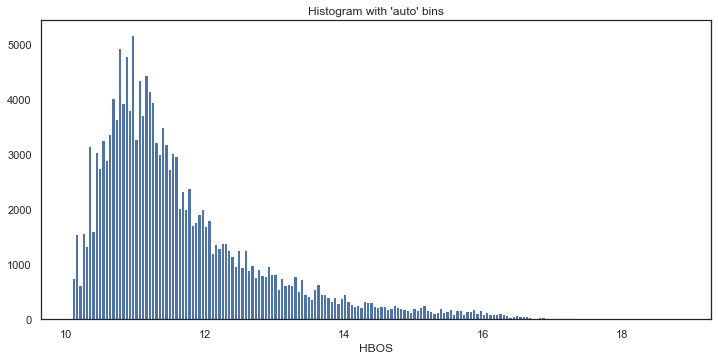

In [52]:
import matplotlib.pyplot as plt
plt.hist(y_scores_hbos, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.xlabel('HBOS')
plt.show()

Another way to determine the threshold is to use the histogram of the outlier score, which allows us to select a threshold value by the graph. We can see that the histogram suggest that the threshold value is 14, which is slightly lower than the previous method.

In [53]:
threshold = hbos.threshold_ # Or other value from the above histogram

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X,y_scores_hbos, threshold)

,Group,Count,Count %,Average_Total_Payments,Average_Medicare_Payments,ratio_mean_by_provider,ratio_Average_beneficiary_Payments,total_payments_by_states,discharge_by_states,Anomaly_Score
0,Normal,154910,94.998927,9599.36,8458.14,1.29,0.14,7279.51,42.83,11.47
1,Outlier,8155,5.001073,11761.16,9184.91,1.67,0.33,7107.14,41.79,15.31


The table shows the size of the outlier group, which is about 5.001 percent. It also shows the average anomaly score, which verifies the data in the outlier group are outliers by having the outlier much higher than normal average anomaly score. Also, we can see the feature statistics in each group. We supposed to see the feature values in the outlier group either higher or lower than those of the normal group, which we did.

In [54]:
Actual_pred = pd.DataFrame({'Actual': y_pred_hbos, 'Anomaly_Score': y_scores_hbos})
Actual_pred['Pred'] = np.where(Actual_pred['Anomaly_Score']< threshold,0,1)
pd.crosstab(Actual_pred['Actual'],Actual_pred['Pred'])

Pred,0,1
Actual,,
0,154910,5
1,0,8150


There is the confusion matrix that used to understand the model performance. The matrix shows that the  model did a good job since it identifies 8150 out of 8150 of outliers and 154910 out of 154915 normal group, only missed 5.

# Week 6 Assignment

In [55]:
X = data10[['Average_Total_Payments','Average_Medicare_Payments','ratio_mean_by_provider','ratio_Average_beneficiary_Payments','total_payments_by_states','discharge_by_states']]
X.head()

,Average_Total_Payments,Average_Medicare_Payments,ratio_mean_by_provider,ratio_Average_beneficiary_Payments,total_payments_by_states,discharge_by_states
0,5777.24,4763.73,1.514395,0.175432,5876.37,39.258322
1,5787.57,4976.71,1.177028,0.140104,5876.37,39.258322
2,5434.95,4453.79,1.508245,0.180528,5876.37,39.258322
3,5417.56,4129.16,1.510209,0.237819,5876.37,39.258322
4,5658.33,4851.44,1.376628,0.142602,5876.37,39.258322


# ECOD

ECOD model determine outliers by measuring the location in a distribution. By multiplies the estimated tail probabilities of all dimensions, it could get the anomaly score for an observation. The pro of using ECOD is that it could save time for large dataset since it has no hyper-parameters to turn.

In [56]:
from pyod.models.ecod import ECOD
ecod = ECOD(contamination=0.05)
ecod.fit(X)

y_scores_ecod = ecod.decision_function(X)
y_pred_ecod = ecod.predict(X)

# Threshold for the defined contamination rate
print("The threshold for the defined contamination rate:" , ecod.threshold_)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic.
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The data:", count_stat(y_pred_ecod))

The threshold for the defined contamination rate: 16.9613119824961
The data: {0: 154911, 1: 8154}


The model shows that we have a contamination rate of 16.961. Based on the model, any observation that has an anomaly score value that is greater than 16.961 is considered as an outlier. Also, within the 163065 of observations, 8154 are outliers and 154911 are not.

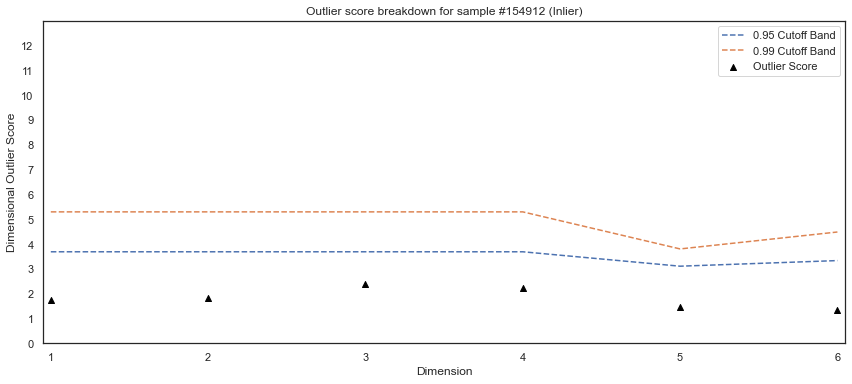

In [57]:
ecod.explain_outlier(154911)

Since the univariate outlier scores are all below the 95% cutoff band, we could see that ECOD model does not work for this data as much.

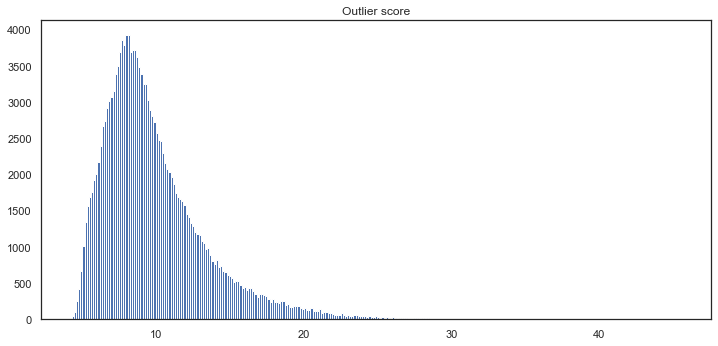

In [58]:
plt.hist(y_scores_ecod, bins='auto') # arguments are passed to np.histogram
plt.title("Outlier score")
plt.show()

Another way to determine the threshold is to use the histogram of the outlier score, which allows us to select a threshold value by the graph. We can see that the histogram suggest that the threshold value is 16, which is slightly lower than the previous method.

In [59]:
threshold = ecod.threshold_ # Or other value from the above histogram

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X,y_scores_ecod, threshold)

,Group,Count,Count %,Average_Total_Payments,Average_Medicare_Payments,ratio_mean_by_provider,ratio_Average_beneficiary_Payments,total_payments_by_states,discharge_by_states,Anomaly_Score
0,Normal,154911,94.99954,8880.01,7705.85,1.32,0.15,7259.40,42.82,9.33
1,Outlier,8154,5.00046,25427.72,23477.17,1.13,0.16,7489.26,42.01,20.13


The table shows the size of the outlier group, which is about 5.0005 percent. It also shows the average anomaly score, which verifies the data in the outlier group are outliers by having the outlier much higher than normal average anomaly score. Also, we can see the feature statistics in each group. We supposed to see the feature values in the outlier group either higher or lower than those of the normal group, which we did.

In [60]:
Actual_pred = pd.DataFrame({'Actual': y_pred_ecod, 'Anomaly_Score': y_scores_ecod})
Actual_pred['Pred'] = np.where(Actual_pred['Anomaly_Score']< threshold,0,1)
pd.crosstab(Actual_pred['Actual'],Actual_pred['Pred'])

Pred,0,1
Actual,,
0,154911,0
1,0,8154


There is the confusion matrix that used to understand the model performance. The matrix shows that the model did a good job since it identifies 8154 out of 8154 of outliers and identifies 154911 out of 154911 of the normal group.

# PCA

PCA performs a linear transformation to convert a set of data points of possibly correlated variables into a set of data points of linearly uncorrelated variables. Also, PCA finds new variables that the original variables are just their linear combinations.

In [118]:
X = data10[['Average_Total_Payments','Average_Medicare_Payments','ratio_mean_by_provider','ratio_Average_beneficiary_Payments','total_payments_by_states','discharge_by_states']]
X.head()

,Average_Total_Payments,Average_Medicare_Payments,ratio_mean_by_provider,ratio_Average_beneficiary_Payments,total_payments_by_states,discharge_by_states
0,5777.24,4763.73,1.514395,0.175432,5876.37,39.258322
1,5787.57,4976.71,1.177028,0.140104,5876.37,39.258322
2,5434.95,4453.79,1.508245,0.180528,5876.37,39.258322
3,5417.56,4129.16,1.510209,0.237819,5876.37,39.258322
4,5658.33,4851.44,1.376628,0.142602,5876.37,39.258322


In [119]:
from pyod.models.pca import PCA
pca = PCA(contamination=0.05)
pca.fit(X)

# get the prediction labels and outlier scores of the training data
y_pred_pca = pca.labels_  # binary labels (0: inliers, 1: outliers)
y_scores_pca = pca.decision_scores_  # .decision_scores_ yields the raw outlier scores for the training data

# Threshold for the defined contamination rate
print("The threshold for the defined contamination rate:" , ecod.threshold_)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic.
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The data:", count_stat(y_pred_pca))

The threshold for the defined contamination rate: 16.9613119824961
The data: {0: 154911, 1: 8154}


The model shows that we have a contamination rate of 16.961. Based on the model, any observation that has an anomaly score value that is greater than 16.961 is considered as an outlier. Also, within the 163065 of observations, 8154 are outliers and 154911 are not.

In [63]:
pca.get_params()

{'contamination': 0.05,
 'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'n_selected_components': None,
 'random_state': None,
 'standardization': True,
 'svd_solver': 'auto',
 'tol': 0.0,
 'weighted': True,
 'whiten': False}

We could see if the default parameter performs normalization before executing PCA. The standardization is true, which means that it performs normalization.

In [64]:
[pca.explained_variance_,
 pca.explained_variance_ratio_]

[array([2.96188727, 1.03615862, 0.98233013, 0.68185368, 0.3328462 ,
        0.0049609 ]),
 array([0.49364485, 0.17269204, 0.16372068, 0.11364158, 0.05547403,
        0.00082681])]

This output shows the first PC explains 49.4% variance, the second PC explains an additional 17.3%, the third 16.4%, and so on. The sum of the explained variance shall sum up to 100%.

In [65]:
threshold = pca.threshold_
threshold

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X,y_scores_pca, threshold)

,Group,Count,Count %,Average_Total_Payments,Average_Medicare_Payments,ratio_mean_by_provider,ratio_Average_beneficiary_Payments,total_payments_by_states,discharge_by_states,Anomaly_Score
0,Normal,154911,94.99954,8530.14,7395.56,1.35,0.15,7242.10,42.78,2807.95
1,Outlier,8154,5.00046,32074.67,29372.19,0.57,0.13,7817.85,42.77,7272.34


The table shows the size of the outlier group, which is about 5.0005 percent. It also shows the average anomaly score, which verifies the data in the outlier group are outliers by having the outlier much higher than normal average anomaly score. Also, we can see the feature statistics in each group. We supposed to see the feature values in the outlier group either higher or lower than those of the normal group, which we did.

In [66]:
Actual_pred = pd.DataFrame({'Actual': y_pred_pca, 'Anomaly_Score': y_scores_pca})
Actual_pred['Pred'] = np.where(Actual_pred['Anomaly_Score']< threshold,0,1)
pd.crosstab(Actual_pred['Actual'],Actual_pred['Pred'])

Pred,0,1
Actual,,
0,154911,0
1,0,8154


There is the confusion matrix that used to understand the model performance. The matrix shows that the model did a good job since it identifies 8154 out of 8154 of outliers and identifies 154911 out of 154911 of the normal group.

In [67]:
# Put the actual, the HBO score and the ECOD score together
Actual_preds = pd.DataFrame({'HBO_Score': y_scores_hbos,
                             'ECOD_Score': y_scores_ecod,
                             'PCA_Score': y_scores_pca})
Actual_preds['HBOS_pred'] = np.where(Actual_preds['HBO_Score']>hbos.threshold_,1,0)
Actual_preds['ECOD_pred'] = np.where(Actual_preds['ECOD_Score']>ecod.threshold_,1,0)
Actual_preds['PCA_pred'] = np.where(Actual_preds['PCA_Score']>pca.threshold_,1,0)
Actual_preds.head()

,HBO_Score,ECOD_Score,PCA_Score,HBOS_pred,ECOD_pred,PCA_pred
0,11.446965,9.284058,2514.831309,0,0,0
1,11.196570,8.639228,2482.254070,0,0,0
2,11.446893,9.622639,2555.777538,0,0,0
3,12.212569,10.555706,2828.334601,0,0,0
4,11.056275,8.752504,2466.713570,0,0,0


This table shows the comparison of three models, HBOS, ECOD, and PCA.

In [68]:
pd.crosstab(Actual_preds['HBOS_pred'],Actual_preds['ECOD_pred'])

ECOD_pred,0,1
HBOS_pred,,
0,150188,4727
1,4723,3427


By cross-tabulate the HBOS and the ECOD predictions, 3427 observations are identified by both models to be outliers.

In [69]:
pd.crosstab(Actual_preds['HBOS_pred'],Actual_preds['PCA_pred'])

PCA_pred,0,1
HBOS_pred,,
0,148908,6007
1,6003,2147


By cross-tabulate the HBOS and the PCA predictions, 2147 observations are identified by both models to be outliers.

In [70]:
pd.crosstab(Actual_preds['ECOD_pred'],Actual_preds['PCA_pred'])

PCA_pred,0,1
ECOD_pred,,
0,152065,2846
1,2846,5308


By cross-tabulate the ECOD and the PCA predictions, 5308 observations are identified by both models to be outliers.

# Week 7 Assignment

In [90]:
X = data10[['Average_Total_Payments','Average_Medicare_Payments','ratio_mean_by_provider','ratio_Average_beneficiary_Payments','total_payments_by_states','discharge_by_states']]
X.head()

,Average_Total_Payments,Average_Medicare_Payments,ratio_mean_by_provider,ratio_Average_beneficiary_Payments,total_payments_by_states,discharge_by_states
0,5777.24,4763.73,1.514395,0.175432,5876.37,39.258322
1,5787.57,4976.71,1.177028,0.140104,5876.37,39.258322
2,5434.95,4453.79,1.508245,0.180528,5876.37,39.258322
3,5417.56,4129.16,1.510209,0.237819,5876.37,39.258322
4,5658.33,4851.44,1.376628,0.142602,5876.37,39.258322


# Autoencoder

Autoencoder detect anomaly by a special type of neural network, which is copying the input values to the output value and find the hidden core layer. In an autoencoder model, the number of neurons in the hidden layers has to be less than that of the input layers. Then it can extract the essential information of the input values and learn the most patterns of the data and ignore the noises when the number of neurons in the hidden layers is less than that of the input layers. This cannot achieve when the neurons in the hidden layers is more than the input layers since the neural network will be given too much capacity to lean the data.

In [74]:
from pyod.models.auto_encoder import AutoEncoder
atcdr = AutoEncoder(contamination=0.05, hidden_neurons =[2, 2])
atcdr.fit(X)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 2)                 14        
                                                                 
 dropout_2 (Dropout)         (None, 2)                 0         
                                                                 
 dense_3 (Dense)             (None, 2)                 6

AutoEncoder(batch_size=32, contamination=0.05, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[2, 2], l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7ff49e59b3a0>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [91]:
y_scores_auto = atcdr.decision_function(X)
y_pred_auto = atcdr.predict(X)

# Threshold for the defined comtanimation rate
print("The threshold for the defined contamination rate:" , atcdr.threshold_)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic.
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_pred_auto))

5096/5096 [==============================] - 4s 725us/step
The threshold for the defined contamination rate: 4.124863406346537
The training data: {0: 154911, 1: 8154}


The model shows that we have a contamination rate of 4.125. Based on the model, any observation that has an anomaly score value that is greater than 4.125 is considered as an outlier. Also, within the 163065 of observations, 8154 are outliers and 154911 are not.

In [92]:
threshold = atcdr.threshold_ # Or other value from the above histogram

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X,y_scores_auto, threshold)

,Group,Count,Count %,Average_Total_Payments,Average_Medicare_Payments,ratio_mean_by_provider,ratio_Average_beneficiary_Payments,total_payments_by_states,discharge_by_states,Anomaly_Score
0,Normal,154911,94.99954,8525.79,7392.80,1.35,0.15,7241.93,42.78,1.99
1,Outlier,8154,5.00046,32157.21,29424.62,0.56,0.13,7821.04,42.76,5.73


The table shows the size of the outlier group, which is about 5.0005 percent. It also shows the average anomaly score, which verifies the data in the outlier group are outliers by having the outlier much higher than normal average anomaly score. Also, we can see the feature statistics in each group. We supposed to see the feature values in the outlier group either higher or lower than those of the normal group, which we did except two variables, ratio_Average_beneficiary_Payments and discharge_by_states.

In [93]:
Actual_pred = pd.DataFrame({'Actual': y_pred_auto, 'Anomaly_Score': y_scores_auto})
Actual_pred['Pred'] = np.where(Actual_pred['Anomaly_Score']< threshold,0,1)
pd.crosstab(Actual_pred['Actual'],Actual_pred['Pred'])

Pred,0,1
Actual,,
0,154911,0
1,0,8154


There is the confusion matrix that used to understand the model performance. The matrix shows that the model did a good job since it identifies 8154 out of 8154 of outliers and identifies 154911 out of 154911 of the normal group.

# Forest

IForest identifies outliers by finding the observations that have short average path lengths on the iTrees. It can find the anomalies directly instead of finding the normal data first then identify those that are not.

In [94]:
X = data10[['Average_Total_Payments','Average_Medicare_Payments','ratio_mean_by_provider','ratio_Average_beneficiary_Payments','total_payments_by_states','discharge_by_states']]
X.head()

,Average_Total_Payments,Average_Medicare_Payments,ratio_mean_by_provider,ratio_Average_beneficiary_Payments,total_payments_by_states,discharge_by_states
0,5777.24,4763.73,1.514395,0.175432,5876.37,39.258322
1,5787.57,4976.71,1.177028,0.140104,5876.37,39.258322
2,5434.95,4453.79,1.508245,0.180528,5876.37,39.258322
3,5417.56,4129.16,1.510209,0.237819,5876.37,39.258322
4,5658.33,4851.44,1.376628,0.142602,5876.37,39.258322


In [95]:
from pyod.models.iforest import IForest
isft = IForest(contamination=0.05, max_samples=40, behaviour='new')
isft.fit(X)

y_scores_forest = isft.decision_function(X)
y_pred_forest = isft.predict(X)

# Threshold for the defined comtanimation rate
print("The threshold for the defined contamination rate:" , isft.threshold_)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic.
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_pred_forest))

The threshold for the defined contamination rate: 1.3861535363139015e-17
The training data: {0: 154911, 1: 8154}


The model shows that we have a contamination rate that is extremely small, which is also the case in the example code Therefore, we will find the threshold using another way later. Also, within the 163065 of observations, 8154 are outliers and 154911 are not.

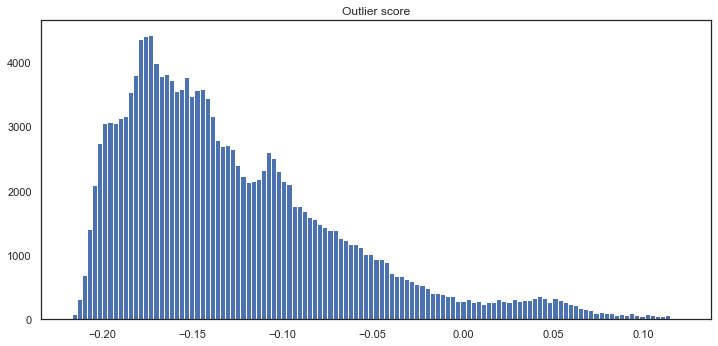

In [115]:
plt.hist(y_scores_forest, bins='auto') # arguments are passed to np.histogram
plt.title("Outlier score")
plt.show()

Another way to determine the threshold is to use the histogram of the outlier score, which allows us to select a threshold value by the graph. We can see that the histogram suggest that the threshold value is around -0.05, which is much more reasonable than the previous method.

In [96]:
isft.get_params()

{'behaviour': 'new',
 'bootstrap': False,
 'contamination': 0.05,
 'max_features': 1.0,
 'max_samples': 40,
 'n_estimators': 100,
 'n_jobs': 1,
 'random_state': None,
 'verbose': 0}

Here is the hyper parameters of the model. max_sample is the size of a tree. n_estimators is the number of trees in the ensemble. Max features is the number of features to draw from X to train each base estimator. n_jobs is the number of jobs to run in parallel for both fit and predict.

In [97]:
isft_vi = isft.feature_importances_
isft_vi

array([0.18187576, 0.17034824, 0.16975373, 0.18321537, 0.14007187,
       0.15473502])

This the feature importance, which shows the relative strength of features in determining outliers.

<AxesSubplot:>

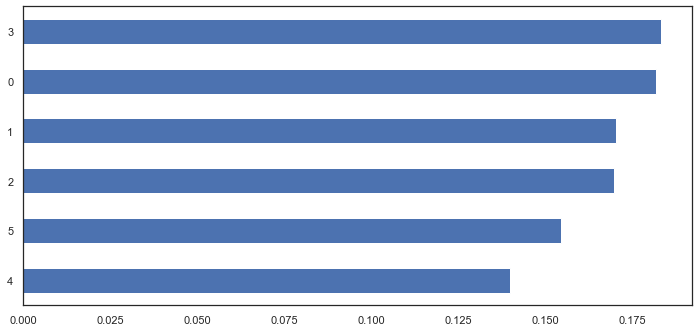

In [98]:
for_plot = pd.DataFrame({'x_axis':X.columns,
                         'y_axis':isft_vi}).sort_values(by='y_axis',ascending=True)
for_plot['y_axis'].plot.barh()

This is the graph for the feature importance. We can see that the forth and the first features has relatively high importance, which refers to Average_Total_Payments, and ratio_Average_beneficiary_Payments.

In [100]:
threshold = isft.threshold_ # Or other value from the above histogram

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X, y_scores_forest, threshold)

,Group,Count,Count %,Average_Total_Payments,Average_Medicare_Payments,ratio_mean_by_provider,ratio_Average_beneficiary_Payments,total_payments_by_states,discharge_by_states,Anomaly_Score
0,Normal,154911,94.99954,8395.40,7260.85,1.36,0.16,7238.49,42.82,-0.14
1,Outlier,8154,5.00046,34634.55,31931.46,0.41,0.09,7886.56,42.03,0.04


The table shows the size of the outlier group, which is about 5.0005 percent. It also shows the average anomaly score, which verifies the data in the outlier group are outliers by having the outlier much higher than normal average anomaly score. Also, we can see the feature statistics in each group. We supposed to see the feature values in the outlier group either higher or lower than those of the normal group, which we did except one variables, discharge_by_states.

In [101]:
Actual_pred = pd.DataFrame({'Actual': y_pred_forest, 'Anomaly_Score': y_scores_forest})
Actual_pred['Pred'] = np.where(Actual_pred['Anomaly_Score']< threshold,0,1)
pd.crosstab(Actual_pred['Actual'],Actual_pred['Pred'])

Pred,0,1
Actual,,
0,154911,0
1,0,8154


There is the confusion matrix that used to understand the model performance. The matrix shows that the model did a good job since it identifies 8154 out of 8154 of outliers and identifies 154911 out of 154911 of the normal group.

# Compare Models

We have all models including the ones from last week together

In [107]:
Actual_preds = pd.DataFrame({'HBOS_Score': y_scores_hbos,
                             'ECOD_Score': y_scores_ecod,
                             'PCA_Score': y_scores_pca,
                             'Auto_Score': y_scores_auto,
                             'Forest_Score': y_scores_forest})
Actual_preds['HBOS_pred'] = np.where(Actual_preds['HBOS_Score']>hbos.threshold_,1,0)
Actual_preds['ECOD_pred'] = np.where(Actual_preds['ECOD_Score']>ecod.threshold_,1,0)
Actual_preds['PCA_pred'] = np.where(Actual_preds['PCA_Score']>pca.threshold_,1,0)
Actual_preds['Auto_pred'] = np.where(Actual_preds['Auto_Score']>atcdr.threshold_,1,0)
Actual_preds['Forest_pred'] = np.where(Actual_preds['Forest_Score']>isft.threshold_,1,0)
Actual_preds.head()

,HBOS_Score,ECOD_Score,PCA_Score,Auto_Score,Forest_Score,HBOS_pred,ECOD_pred,PCA_pred,Auto_pred,Forest_pred
0,11.446965,9.284058,2514.831309,1.746398,-0.171774,0,0,0,0,0
1,11.196570,8.639228,2482.254070,1.708054,-0.169145,0,0,0,0,0
2,11.446893,9.622639,2555.777538,1.779865,-0.173251,0,0,0,0,0
3,12.212569,10.555706,2828.334601,2.012290,-0.160887,0,0,0,0,0
4,11.056275,8.752504,2466.713570,1.702942,-0.172009,0,0,0,0,0


This table shows the comparison of 5 models, HBOS, ECOD, PCA, Autoencoder, and Forest.

In [108]:
pd.crosstab(Actual_preds['Auto_pred'],Actual_preds['Forest_pred'])

Forest_pred,0,1
Auto_pred,,
0,153336,1575
1,1575,6579


By cross-tabulate the Autoencoder and the Forest predictions, 6579 observations are identified by both models to be outliers.

In [109]:
pd.crosstab(Actual_preds['Auto_pred'],Actual_preds['HBOS_pred'])

HBOS_pred,0,1
Auto_pred,,
0,148891,6020
1,6024,2130


By cross-tabulate the HBOS and the Autoencoder predictions, 2130 observations are identified by both models to be outliers.

In [110]:
pd.crosstab(Actual_preds['Forest_pred'],Actual_preds['HBOS_pred'])

HBOS_pred,0,1
Forest_pred,,
0,148319,6592
1,6596,1558


By cross-tabulate the HBOS and the Forest predictions, 1558 observations are identified by both models to be outliers.

In [111]:
pd.crosstab(Actual_preds['Auto_pred'],Actual_preds['ECOD_pred'])

ECOD_pred,0,1
Auto_pred,,
0,152046,2865
1,2865,5289


By cross-tabulate the Autoencoder and the ECOD predictions, 5289 observations are identified by both models to be outliers.

In [112]:
pd.crosstab(Actual_preds['Forest_pred'],Actual_preds['ECOD_pred'])

ECOD_pred,0,1
Forest_pred,,
0,151710,3201
1,3201,4953


By cross-tabulate the Forest and the ECOD predictions, 4953 observations are identified by both models to be outliers.

In [113]:
pd.crosstab(Actual_preds['Auto_pred'],Actual_preds['PCA_pred'])

PCA_pred,0,1
Auto_pred,,
0,154855,56
1,56,8098


By cross-tabulate the Autoencoder and the PCA predictions, 8098 observations are identified by both models to be outliers.

In [114]:
pd.crosstab(Actual_preds['Forest_pred'],Actual_preds['PCA_pred'])

PCA_pred,0,1
Forest_pred,,
0,153321,1590
1,1590,6564


By cross-tabulate the Forest and the PCA predictions, 6564 observations are identified by both models to be outliers.

Comparing all cross-tabulate, Autoencoder and PCA has the most observations that are joint outliers.